In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [12]:
# Load dataset
df = pd.read_csv("/Users/dhruvpai/Downloads/Datasets for practicals/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
X = data.select_dtypes(include=[float, int])

In [14]:
x_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']] #X_data=df.drop()
y_data = df['Species']
x_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Use elbow method to find optimal number of clusters
inertia = []
k_range = range(1, 11)

In [30]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

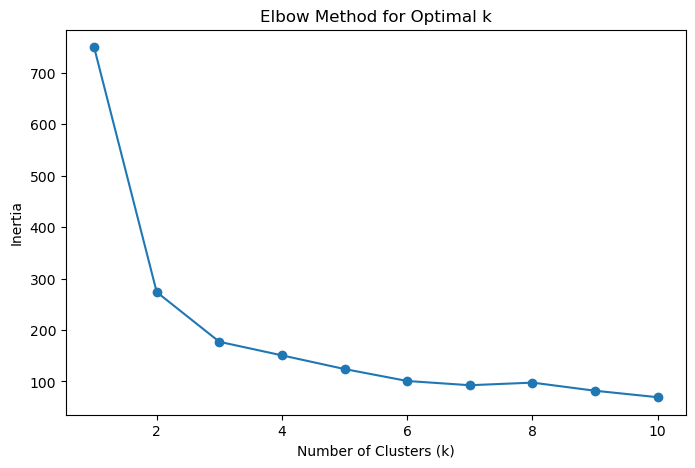

In [31]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [32]:
# Apply K-Means with the chosen number of clusters (e.g., 3 for Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [33]:
# Add the cluster labels to the original data for visualization or analysis
data['Cluster'] = clusters
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


Explanation 
Import Libraries:

pandas for handling the dataset.
matplotlib.pyplot for visualization.
KMeans from scikit-learn to apply the K-Means clustering algorithm.
StandardScaler to standardize the feature values for better clustering results.

Load Dataset:
Loads the Iris dataset. Ensure the filepath points to your downloaded dataset.

Select Only Numeric Features:
X = data.select_dtypes(include=[float, int]): Filters out non-numeric columns, keeping only numeric columns necessary for K-Means clustering.

Standardize the Data:
Standardizes numeric data, helping the K-Means algorithm handle different feature scales.

Elbow Method:
Loops through values of k (from 1 to 10) to compute inertia values for each cluster count, then plots the results to help find the optimal number of clusters.
inertia = [] initializes a list to store the inertia values for each k (number of clusters).
k_range = range(1, 11): Specifies the range of k values to test (from 1 to 10 clusters).
For each k in k_range, the code:
Creates a KMeans model with k clusters.
Fits the model to the scaled data.
Appends the inertia_ attribute (sum of squared distances between points and their closest cluster center) to inertia.
Plotting k vs. inertia reveals an "elbow" point where the decrease in inertia slows down, indicating the optimal number of clusters.

Applying K-Means with Optimal Clusters:
After determining the best k, runs K-Means clustering and stores the cluster label for each data point.
This updated code should work without errors since it directly handles numeric data only, sidestepping issues with non-numeric entries.

kmeans = KMeans(n_clusters=3, random_state=42): Sets up K-Means with the optimal number of clusters (e.g., 3 for the Iris dataset).
clusters = kmeans.fit_predict(X_scaled): Fits the K-Means model and predicts the cluster for each data point, storing the results in clusters.

Adding Cluster Labels to the Original Data:
data['Cluster'] = clusters: Adds a new column to the original data to store the cluster label for each data point.
print(data.head()): Displays the first few rows of the dataset with the cluster labels.

K-Means Clustering: K-Means partitions data points into k clusters by minimizing the distance between each data point and the cluster centroid. The algorithm iteratively assigns data points to clusters and updates the centroids until convergence.

Elbow Method: The elbow method helps identify the optimal number of clusters by plotting the inertia for different values of k. The “elbow” point, where inertia begins to decrease more slowly, suggests a suitable k value.